# Use PY in Linear Algebrea
<br>

## Chapter Zero 乘法和庫
<br>
### 矩陣和向量的乘法
1. 點乘（dot product）：也被稱為「數量積」「內積」「點積」。結果的絕對值是一個向量在另一個向量方向上的投影的長度誠意另一個向量的長度，是一個標量。
2. 叉乘（cross product）：也被稱為「向量積」「外積」。對於兩個 $n$ 緯的向量叉乘，結果是一個和 $n-1$ 個向量都垂直的向量，方向符合右手定則。
3. 矩陣乘法：代表了線性變換的過程。
<br>

### python 的 sympy 库 和 numpy 库
说明：sympy 用於模擬和理解，numpy 用於实践。
<br> 

#### sympy
`sympy`使用`*`代表矩陣乘法；<br>
`sympy`使用`dot`表示點乘；<br>
`sympy`使用`cross`表示叉乘<br>
`det()`表示行列式；`inv()`表示擬矩陣；`adjugate()`伴隨矩陣<br>

#### numpy
`numpy`使用`*`表示`array`乘法默認是按照位置的乘法，矩陣`matrix`默認的是矩陣乘法，混合起來的話默認是矩陣乘法；<br>
`numpy`使用`dot`表示矩陣`matrix`和`array`的矩陣乘法；<br>
`numpy`使用`cross`表示叉乘；<br>
`numpy`使用`det()`表示行列式；<br>
`.T` 返回自身的轉置；<br>
`.H` 返回自身的共軛轉置；<br>
`.J` 返回自身的逆矩陣；<br>
`.A` 返回自身數據的2維數組的一個視圖（沒有做任何的拷貝）<br>

## Chapter One Matrix 

數學上，一個$m\times n$的矩陣是由一個$m$行(row)$n$列(column)元素排列成的矩形陣列，矩陣裡的元素可以是數字、符號或者數學式。在圖像處理、人工智能燈領域，使用矩陣來表示和處理數據非常常見。例：<br>
$\mathbf{A}_{2 \times 3}=\begin{bmatrix} 5 & 2 & 7 \\ 1 & 3 & 4  \end{bmatrix}$
<br>
其中，矩陣$A$的下標$2\times 3$表示$A$是一個2行3列的矩陣。類似的，另一個示例：<br>
$\mathbf{ B }_{ 4 \times 4 }=\begin{bmatrix} 5 & 2 & 7 & 6 \\ 1 & 3 & 4 & 2 \\ 7 & -1 & 9 & 0 \\ 8  & 2 & -2 & 3 \end{bmatrix}$<br>
特別的，如果我們要表示矩陣$A$的第二行第二個元素：3，可以使用$A[2,2]$或者$a_{2,2}$。<br><br>
在`python`中的`numpy`庫中提供了`ndarrary`類用於儲存高維數組及普通的數組運算，另外提供了`matrix`類用來支持矩陣運算（矩陣乘法）。下面來舉個例子：

In [11]:
#first method to store the matrix
import numpy as np

a = np.matrix('5 2 7;1 3 4')
b = np.matrix('15 2 7 6;1 3 4 2;7 -1 9 0;8 2 -2 3')
print(a)#print matrix a
print(b)#print matrix b

[[5 2 7]
 [1 3 4]]
[[15  2  7  6]
 [ 1  3  4  2]
 [ 7 -1  9  0]
 [ 8  2 -2  3]]
[[5 2 7]
 [1 3 4]]
[[15  2  7  6]
 [ 1  3  4  2]
 [ 7 -1  9  0]
 [ 8  2 -2  3]]


In [12]:
#second method to store the matrix
import numpy as np

a = np.matrix([[5,2,7],[1,3,4]])
b = np.matrix([[5,2,7,6],[1,3,4,2],[8,2,-2,3]])
print(a)#print matrix a
print(b)#print matrix b

[[5 2 7]
 [1 3 4]]
[[ 5  2  7  6]
 [ 1  3  4  2]
 [ 8  2 -2  3]]
[[5 2 7]
 [1 3 4]]
[[ 5  2  7  6]
 [ 1  3  4  2]
 [ 8  2 -2  3]]


這兩種形式完全等效，但是第一種更加直觀，不容易犯錯，所以推薦第一種方式（也很類似`LaTeX`中構成矩陣的寫法）；<br>
要把一個`matrix`的對象轉換為`ndarray`對象，可以直接用`getA()`的方法。如果吧`ndarray`對象轉換成`matrx`對象可以用`asmatrix()`方法。

In [13]:
b = a.getA()#turn a into ndarray
print(b)
print(type(b))# the type of b
c = np.asmatrix(b)
print(c)
print(type(c))# the type of c

[[5 2 7]
 [1 3 4]]
<class 'numpy.ndarray'>
[[5 2 7]
 [1 3 4]]
<class 'numpy.matrixlib.defmatrix.matrix'>
[[5 2 7]
 [1 3 4]]
<class 'numpy.ndarray'>
[[5 2 7]
 [1 3 4]]
<class 'numpy.matrixlib.defmatrix.matrix'>


如果你要取出矩陣中的某個值，可以使用類似於數組的下標運算符。但是要注意，計算機的計數方式是從0開始的。例如，要取出$A[2,2]$，應該使用：

In [14]:
a[1,1]

3

3

### 運算

#### 加
矩陣加法的定義非常符合直覺。假設有$\mathbf{ A }_{ 3 \times 3 }=\begin{bmatrix} 1 & 0 & 1 \\ 1 & 2 & 1 \\ 2 & 1 & 1 \end{bmatrix}$，$\mathbf{ B }_{ 3 \times 3 }=\begin{bmatrix} 2 & 1 & -1 \\ 0 & -1 & 2 \\ 2 & -1 & 0 \end{bmatrix}$，<br> 則：
$\mathbf{A}+\mathbf{B} = \begin{bmatrix} 1 & 0 & 1 \\ 1 & 2 & 1 \\ 2 & 1 & 1 \end{bmatrix} + \begin{bmatrix} 2 & 1 & -1 \\ 0 & -1 & 2 \\ 2 & -1 & 0 \end{bmatrix} = \begin{bmatrix} 1+2 & 0+1 & 1+(-1) \\ 1+ 0 & 2+(-1) & 1+2 \\ 2+2 & 1+(-1) & 1+0 \end{bmatrix} = \begin{bmatrix} 3 & 1 & 0 \\ 1 & 1 & 3 \\ 4 & 0 & 1 \end{bmatrix}$
<br>
要注意，兩個矩陣的行數和列數必須相同，否則無定義。下面是`python`示例：

In [15]:
a = np.matrix('1 0 1;1 2 1;2 1 1')
b = np.matrix('2 1 -1;0 -1 2;2 -1 0')
print(a+b)# print a+b

[[3 1 0]
 [1 1 3]
 [4 0 1]]
[[3 1 0]
 [1 1 3]
 [4 0 1]]


很容易看出，矩陣的加法滿足交換律和結合律，即$A+B=B+A$，$(A+B)+C=A+(B+C)$。

#### 減
矩陣減法也和加法一樣簡單。對於上面給出的$A$和$B$，有：<br>
$\mathbf{A}-\mathbf{B}=\begin{bmatrix} 1 & 0 & 1 \\ 1 & 2 & 1 \\ 2 & 1 & 1 \end{bmatrix}-\begin{bmatrix} 2 & 1 & -1 \\ 0 & -1 & 2 \\ 2 & -1 & 0 \end{bmatrix}=\begin{bmatrix} 1-2 & 0-1 & 1-(-1) \\ 1-0 & 2-(-1) & 1-2 \\ 2-2 & 1-(-1) & 1-0 \end{bmatrix}=\begin{bmatrix} -1 & -1 & 2 \\ 1 & 3 & -1 \\ 0 & 2 & 1 \end{bmatrix}$<br>
同樣，相減的兩個矩陣行數和列數必須完全相同，否則無定義。下面是`python`示例：

In [16]:
print(a-b)

[[-1 -1  2]
 [ 1  3 -1]
 [ 0  2  1]]
[[-1 -1  2]
 [ 1  3 -1]
 [ 0  2  1]]


#### 乘
矩陣乘法的定義是$A_{i\times j}$矩陣的每一行的元素分別與$B_{j\times k}$矩陣的每一列的元素兩兩相乘並詳加，從而，得到新的矩陣$C_{j\times k$。兩個矩陣能相乘的充份必要條件是第一個矩陣的列數等於第二個矩陣的行數相等，否則，無定義。$\begin {aligned} 
\mathbf{A} \times \mathbf{B} &=\begin{bmatrix} 1 & 0 & 1 \\ 1 & 2 & 1 \\ 2 & 1 & 1 \end{bmatrix}\times \begin{bmatrix} 2 & 1 & -1 \\ 0 & -1 & 2 \\ 2 & -1 & 0 \end{bmatrix} \\\ &=\begin{bmatrix} 1\cdot 2+0\cdot 0+1\cdot 2 & 1\cdot 1+0\cdot (-1)+1\cdot (-1) & 1\cdot (-1)+0\cdot 2+1\cdot 0 \\ 1\cdot 2+2\cdot 0+1\cdot 2 & 1\cdot 1+2\cdot (-1)+1\cdot (-1) & 1\cdot (-1)+2\cdot 2+1\cdot 0 \\ 2\cdot 2+1\cdot 0+1\cdot 2 & 2\cdot 1+1\cdot (-1)+1\cdot (-1) & 2\cdot (-1)+1\cdot 2+1\cdot 0 \end{bmatrix}\\\ &=\begin{bmatrix} 4 & 0 & -1 \\ 4 & -2 & 3 \\ 6 & 0 & 0 \end{bmatrix}
\end {aligned}$

再舉一個行列數不同的例子，假設有$\mathbf{C}_{2 \times 3} = \begin{bmatrix} 5 & 7 & 2 \\ 4 & 3 & 1 \end{bmatrix}$和$\mathbf{D}_{3 \times 1} = \begin{bmatrix} 1 \\ 5 \\ 6 \end{bmatrix}$，那麼，我們可以得出：$\mathbf{C}\times \mathbf{D} = \begin{bmatrix} 5 & 7 & 2 \\ 4 & 3 & 1 \end{bmatrix}\times \begin{bmatrix} 1 \\ 5 \\ 6 \end{bmatrix}
 =\begin{bmatrix} 5 \cdot 1+ 7 \cdot 5+ 2\cdot 6 \\ 4\cdot 1+3\cdot 5+1\cdot 6  \end{bmatrix} =\begin{bmatrix} 52 \\ 25 \end{bmatrix}$

與初等代數中學的乘法不同，矩陣的乘法並不滿足交換律，即，$A \times B \neq B \times A$，但是，它滿足分配律：$(A\times B)\times C = A\times (B\times C)$。<br>
再介紹兩個特殊的矩陣：<br>
1. 單位矩陣（Identity Matrix）他的特點是與行數和列數相等，對角線上的值都是1，其他值都是0。另一個特點是：它與任意矩陣$A$相乘結果等於$A$。<br>
$\mathbf{I}_{3 \times 3} = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$這是一個 $3\times 3$的單位矩陣<br>
<br>
2. 零矩陣（Null Matrix）顧名思義就是全部元素都是0的矩陣。零矩陣乘以任何矩陣都是零矩陣，與任何矩陣$A$都等於$A$。

In [17]:
#python示例
print("this is a times b:")
print(a*b)
print("this is b times a:")
print(b*a)

this is a times b:
[[ 4  0 -1]
 [ 4 -2  3]
 [ 6  0  0]]
this is b times a:
[[ 1  1  2]
 [ 3  0  1]
 [ 1 -2  1]]
this is a times b:
[[ 4  0 -1]
 [ 4 -2  3]
 [ 6  0  0]]
this is b times a:
[[ 1  1  2]
 [ 3  0  1]
 [ 1 -2  1]]


In [18]:
c = np.matrix('5 7 2;4 3 1')
d = np.matrix('1;5;6')
print("this is c times d:")
print(c*d)
print("this is a times b times d:")
print(a*b*d)
print("first,we user b times d, then we use a to times the b*d:")
print(a*(b*d))
I = np.eye(3)
#we defined I as a 3 by 3 indentity matrix;eye() equals to'I = np.matrix('1 0 0;0 1 0;0 0 1')'
print("This is a times I:")
print(a*I)
print("This is I times a:")
print(I*a)
z = np.zeros([3,3])
#we define z as a 3 by 3 null matrix; np.zeros() equals to'z = np.matrix('0 0 0;0 0 0;0 0 0')'
print("This is a times z:")
print(a*z)
print("This is z times a:")
print(z*a)

this is c times d:
[[52]
 [25]]
this is a times b times d:
[[-2]
 [12]
 [ 6]]
first,we user b times d, then we use a to times the b*d:
[[-2]
 [12]
 [ 6]]
This is a times I:
[[ 1.  0.  1.]
 [ 1.  2.  1.]
 [ 2.  1.  1.]]
This is I times a:
[[ 1.  0.  1.]
 [ 1.  2.  1.]
 [ 2.  1.  1.]]
This is a times z:
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
This is z times a:
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
this is c times d:
[[52]
 [25]]
this is a times b times d:
[[-2]
 [12]
 [ 6]]
first,we user b times d, then we use a to times the b*d:
[[-2]
 [12]
 [ 6]]
This is a times I:
[[ 1.  0.  1.]
 [ 1.  2.  1.]
 [ 2.  1.  1.]]
This is I times a:
[[ 1.  0.  1.]
 [ 1.  2.  1.]
 [ 2.  1.  1.]]
This is a times z:
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
This is z times a:
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


#### ~~除~~（求逆）
<br>
矩陣中沒有除法這種操作，但是有一個相似的運算，叫做求逆。在線性代數中，給定一個$n$階的方陣$A$ ，若存在一個$n$階矩陣$B$，使得$AB = BA = I_n$，其中$I_n$為$n$階的單位矩陣，則稱$A$是**可逆**的，而$B$則是$A$的逆矩陣，記作：$A^{-1}$。<br>
##### 伴隨陣法：
$\mathbf{A}^{-1}=\frac{1}{|\mathbf{A}|}\begin{bmatrix}A_{11} & A_{21} & \ldots & A_{n1} \\ A_{12} & A_{22} & \ldots & A_{n2} \\ \ldots & \ldots & \ldots & \ldots \\ A_{1n} & A_{2n} & \ldots & A_{nn} \end{bmatrix}$，其中$A_{ij}$是$|A|$中元素$a_{ij}$的代數余子式。
<br>
矩陣$\begin{bmatrix}A_{11} & A_{21} & \ldots & A_{n1} \\ A_{12} & A_{22} & \ldots & A_{n2} \\ \ldots & \ldots & \ldots & \ldots \\ A_{1n} & A_{2n} & \ldots & A_{nn} \end{bmatrix}$稱為矩陣$A$ 的伴隨矩陣，記作$A*$
<br>
##### 初等變換法：
如果矩陣$A$和$B$互逆，則$AB=BA=I$。由$AB=BA$可以得出：兩個矩陣都是方陣；由$AB=I$以及定理“兩個矩陣的乘積的行列式等於兩個矩陣的行列式的乘積”可得：兩個矩陣的行列式不等於零。現在假設三階矩陣${ \mathbf{A} }_{ 3 \times 3 }=\begin{bmatrix} 1 & 0 & 1 \\ 1 & 2 & 1 \\ 2 & 1 & 1 \end{bmatrix}$，則：<br>
$\begin{aligned}
\begin{bmatrix}\mathbf{A} \mathbf{I}\end{bmatrix} 
& \rightarrow 
\begin{bmatrix} 
1 & 0 & 1 & 1 & 0 & 0 \\
1 & 2 & 1 & 0 & 1 & 0 \\
2 & 1 & 1 & 0 & 0 & 1
\end{bmatrix} 
\rightarrow 
\begin{bmatrix} 
1 & 0 & 1 & 1 & 0 & 0 \\
0 & 2 & 0 & -1 & 1 & 0 \\
2 & 1 & 1 & 0 & 0 & 1
\end{bmatrix}
\rightarrow 
\begin{bmatrix} 
1 & 0 & 1 & 1 & 0 & 0 \\
0 & 1 & 0 & -0.5 & 0.5 & 0 \\
2 & 1 & 1 & 0 & 0 & 1
\end{bmatrix}\\
& \rightarrow 
\begin{bmatrix} 
1 & 0 & 1 & 1 & 0 & 0 \\
0 & 1 & 0 & -0.5 & 0.5 & 0 \\
1 & 1 & 0 & -1 & 0 & 1
\end{bmatrix}
\rightarrow 
\begin{bmatrix} 
1 & 0 & 1 & 1 & 0 & 0 \\
0 & 1 & 0 & -0.5 & 0.5 & 0 \\
1 & 0 & 0 & -0.5 & -0.5 & 1
\end{bmatrix}
\rightarrow 
\begin{bmatrix} 
0 & 0 & 1 & 1.5 & 0.5 & -1 \\
0 & 1 & 0 & 0 & 0.5 & 0 \\
1 & 0 & 0 & -0.5 & -0.5 & 1
\end{bmatrix}\\
&\rightarrow 
\begin{bmatrix} 
1 & 0 & 0 & -0.5 & -0.5 & 1 \\
0 & 1 & 0 & -0.5 & 0.5 & 0 \\
0 & 0 & 1 & 1.5 & 0.5 & -1
\end{bmatrix}
\end{aligned}$
<br>
所以：$\mathbf{A}^{-1}=\begin{bmatrix}-0.5 & -0.5 & 1 \\ -0.5 & 0.5 & 0 \\ 1.5 & 0.5 & -1\end{bmatrix}$

### 奇異矩陣（Singular Matrix）
如果一個方陣$A$滿足條件$|A|(det(A))\neq 0$，則稱$A$為非奇異矩陣（non-singular matrix），否則則稱為奇異矩陣。簡單的說**沒有逆矩陣的矩陣就是奇異矩陣，有逆矩陣的矩陣就是非奇異矩陣**<br>
`python`求逆示例：

In [19]:
a = np.matrix('1 0 1; 1 2 1; 2 1 1')
print(a.I) #the inverse of matrix a 
print(a*a.I) #a times a inverse equals to indentity matrix
f = np.matrix('0 1;0 0')
print(f.I)#because f has no inverse, f is a singular matrix

[[-0.5 -0.5  1. ]
 [-0.5  0.5  0. ]
 [ 1.5  0.5 -1. ]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
[[-0.5 -0.5  1. ]
 [-0.5  0.5  0. ]
 [ 1.5  0.5 -1. ]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


LinAlgError: Singular matrix

LinAlgError: Singular matrix

### 矩陣的轉置（Transport）
在線性代數中，矩陣$A$的轉置是另一個矩陣$A^T$，如下所示：<br>
* 把$A$的橫行寫成$A^T$的縱列；
* 把$A$的縱列寫成$A^T$的橫行；
形式上說就是，$m\times n$的矩陣$A$的轉置是$n\times m$矩陣。<br>
矩陣$\underset{m\times n}{\mathbf{A}} = \begin{bmatrix}a_{11} & a_{12} & \ldots & a_{1n} \\ a_{21} & a_{22} & \ldots & a_{2n} \\ \ldots \\ a_{m1} & a_{m2} & \ldots & a_{mn}\end{bmatrix}$的轉置定義為$\underset{n\times n}{A^{T}} = \begin{bmatrix}a_{11} & a_{21} & \ldots & a_{m1} \\ a_{12} & a_{22} & \ldots & a_{m2} \\ \ldots \\ a_{1n} & a_{2n} & \ldots & a_{mn}\end{bmatrix}$

In [20]:
#python 示例：
a = np.matrix('2 4;1 3')
print(a.T)#the transport of a
b = np.matrix('1 2 3;4 5 6')
print(b.T)#the transport of b

[[2 1]
 [4 3]]
[[1 4]
 [2 5]
 [3 6]]
[[2 1]
 [4 3]]
[[1 4]
 [2 5]
 [3 6]]


**特別的，矩陣的轉置有一個性質：矩陣的轉置等於矩陣調換後分別做轉置的乘積：$（A\bullet B)^T = B^T\bullet A^T$**

In [21]:
a = np.matrix('2 4;1 3')
b = np.matrix('1 6;2 5')
c = a*b
print(c.T)
print(b.T*a.T)

[[10  7]
 [32 21]]
[[10  7]
 [32 21]]
[[10  7]
 [32 21]]
[[10  7]
 [32 21]]


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

xlim(-3, 3)
ylim(0, 3.5)
plt.plot([0,2.5],[3.5,0],'blue',[-1,3],[0,3.5],'red')

可以用矩陣表示成：$\begin{bmatrix}
3 & 2 \\
-1 & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
=
\begin{bmatrix}
7\\
1
\end{bmatrix}$
<br>
設$\begin{bmatrix}3 & 2 \\-1 & 1\end{bmatrix}$為矩陣$A$，將等式兩邊左乘一個$A$的逆，就可以得到：<br>
$\begin{aligned}
A^{-1}A
\begin{bmatrix}
x \\ y
\end{bmatrix}
&= 
A^{-1}
\begin{bmatrix}
7\\
1
\end{bmatrix}\\\
&=
\frac{1}{|A|}\begin{bmatrix}1 & -2 \\ 1 & 3\end{bmatrix}
\begin{bmatrix}
7\\
1
\end{bmatrix}\\\
&=
\frac{1}{5}\begin{bmatrix}1 & -2 \\ 1 & 3\end{bmatrix}
\begin{bmatrix}
7\\
1
\end{bmatrix}\\\
&=
\frac{1}{5}\begin{bmatrix}5 \\ 10\end{bmatrix}
\end{aligned}$<br>
因此，$\begin{bmatrix}x \\ y\end{bmatrix}=\begin{bmatrix}1 \\ 2\end{bmatrix}$

雖然這個方法在二元一次方程這看起來還沒有初中學的校園法解得快，但使用矩陣的好處在於對於更高維的數據，比如成白上千的未知數，這個解法依然有效。<br>
在`python`中，我們可以使用`numpy`的線性代數算法庫`linalg`提供的`solve`方法來求解方程組。例：

In [23]:
a = np.matrix('3 2; -1 1')
b = np.matrix('7; 1')
print(np.linalg.solve(a, b))

[[ 1.]
 [ 2.]]
[[ 1.]
 [ 2.]]


### 求向量組合
假設有向量$\vec { a }  =  \begin{bmatrix} 3 \\ -1 \end{bmatrix}$，$\vec { b }  =  \begin{bmatrix} 2 \\ 1 \end{bmatrix}$，求兩者如何組成新向量$\vec { c }  =  \begin{bmatrix} 7 \\ 1 \end{bmatrix}$？

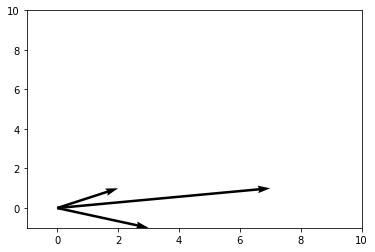

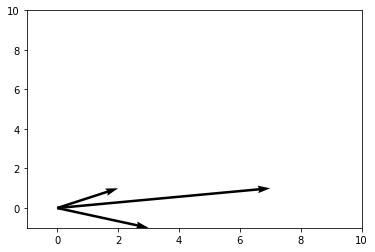

In [24]:
import numpy as np
import matplotlib.pyplot as plt

soa = np.array([[0, 0, 3, -1], [0, 0, 2, 1], [0, 0, 7, 1]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
plt.draw()
plt.show()

如果用$x$和$y$分別表示兩個向量的背書，這個問題就可以用矩陣表示成：$\begin{bmatrix}3 \\-1 \end{bmatrix}x + \begin{bmatrix}2 \\1\end{bmatrix}y=\begin{bmatrix}7\\1\end{bmatrix}$<br>
這樣就把這個問題轉換成和上一個問題同構了，使用同樣的方法可以得出：$\begin{bmatrix}x \\ y\end{bmatrix}=\begin{bmatrix}1 \\ 2\end{bmatrix}$


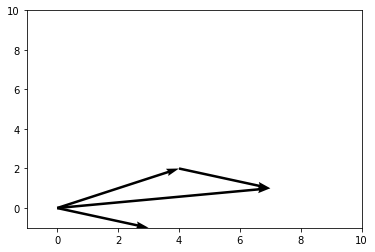

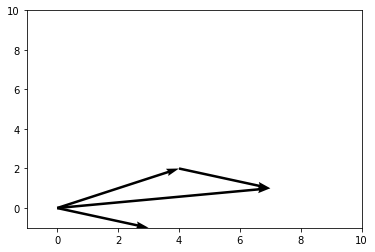

In [25]:
import numpy as np
import matplotlib.pyplot as plt

soa = np.array([[0, 0, 3, -1], [0, 0, 4, 2], [0, 0, 7, 1],[4,2,3,-1]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
plt.draw()
plt.show()

## Chapter Two  Determinant

### 什麼是行列式

**行列式**（Dterminant），在顯示代數中，行列式是一個值，一個數值可以告訴我們一個矩陣是否是奇異的。對於每一個$n\times n$的矩陣$A$，據對應一個標量$det(A)$，它的值將告訴我們矩陣是否為非奇異的。
<br>
1. $2\times 2$ 矩陣的行列式值
<br>
$det(\   
\left[\begin{array}{cc}   
    a & b\\   
    c & d\\      
\end{array}\right]   
\  ) = ad - bc$<br>
我們也可以用`sympy`進行核對：

In [26]:
from sympy import *
   
a,b,c,d = symbols("a,b,c,d")
M1=Matrix([[a, b], [c, d]])
print(M1.det())# print the determinant of matrix M1

a*d - b*c
a*d - b*c


### 行列式的幾何意義：二維和三維歐式空間中的例子

行列式的一個自然的怨氣就是$n$維平行體的體積。行列式的定義和$n$維平行體的體積有著本質上的關聯。<br>
在二維空間中，行列式如上面例子所示；比如說：$det(A,B) =\   
\left|\begin{array}{cc}   
    2 & 3\\   
    1 & 4\\      
\end{array}\right|   
\ = 2\bullet 4 - 3\bullet 1 = 5$，我們經過計算可以知道，當係數是實數的時候，行列式表示的就是向量$\vec A$和$\vec B$ 形成的平行四邊形的**有向面積**

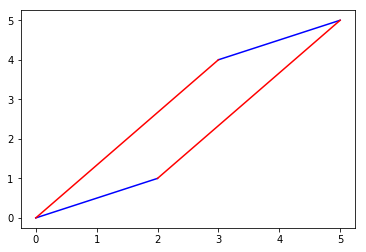

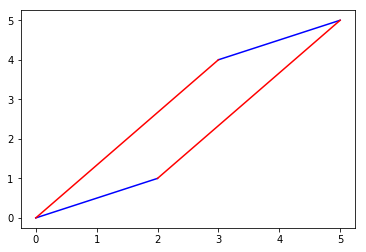

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

plt.plot([0,2],[0,1],'blue',[3,5],[4,5],'blue',[0,3],[0,4],'red',[2,5],[1,5],'red')

In [28]:
import numpy as np
   
a = np.matrix([[2,1],[3,4]])
print(np.linalg.det(a))# print the determinant of matrix M1

5.0
5.0


我們通過計算，可以得到這個矩陣的行列式等於$5$，可以看出，上圖由紅線和藍線形成的是一個平行四邊形，我們可以通過計算得出，它的面積等於$5$<br>
*這裡只是簡單介紹二維行列式，具體請查閱課本**

那如果是三位空間呢？在三維的有向空間中，三個三維向量的行列式是$\left|\begin{array}{ccc}   
    x & x' & x''\\   
    y & y' & z''\\
    z & z' & z''
\end{array}\right|  
\ = xy'z'' + x'y''z + x''yz' - xy''z' - xyz'' - x''y'z $
<br>
比如說，三個向量$(2,1,5),(6,0,8)$ 和 $(3,2,4)$ 的行列式為：
$\left|\begin{array}{ccc}   
    2 & 6 & 3\\   
    1 & 0 & 2\\
    5 & 8 & 4
\end{array}\right| = 28
$

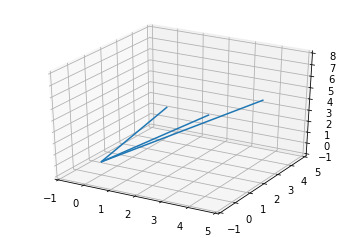

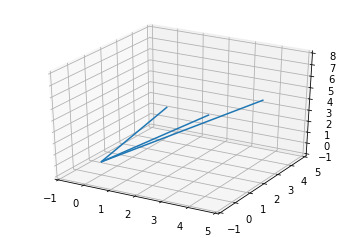

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

p0 = [2, 1,5]
p1 = [6,0,8]
p2 = [3,2,4]

origin = [0,0,0]
X, Y, Z = zip([0,0,0],origin,origin) 
U, V, W = zip(p0,p1,p2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X,Y,Z,U,V,W,arrow_length_ratio=0.001)
ax.set_xlim([-1, 5])
ax.set_ylim([-1, 5])
ax.set_zlim([-1, 8])

plt.show()

類比一下二維向量的行列式，我們可以猜測一下三維向量組的行列式的幾何意義，就是這三個向量行程的平行六面體的**有向體積**<br>；我們可以用`python`來算它的行列式：

In [30]:
a = np.matrix([[2,1,5],[6,0,8],[3,2,4]])
print(np.linalg.det(a))

28.0
28.0


***特別的，如果向量組中，所有向量共線或者共面（線性相關），面積或體積為零**，什麼是線性相關，我們會在後面解釋*

## Chapter Three Vector

### What is Vector

在初中（或高中）物理，我們就已經接觸過向量了，那向量到底是什麼？它是指一個同事具有大小和方向，且滿足平行四邊形法則的集合對象。一般地，同時滿足具有大小和方向兩個性質的集合對象就可以稱作為向量（物理中的電流：有方向，有大小，但是它不是向量，這是特殊情況，我們在線性代數中不討論）。與向量相對的叫做**標量**（scalar），一般標量和向量最大的區別就是是否有向。<br>
在$R^n$空間中定義$\vec V$，可以用一個包含$n$個實數的有序集來表示：$\vec V = \begin{bmatrix} v_1 \\ v_2 \\ \dots \\ v_n\end{bmatrix}$，這個有序集中的每一個元素被稱為向量的分量（在某一維度的量）。例如，一個在$R^2$空間的向量$\begin{bmatrix} 2 \\ 1 \end{bmatrix}$,我們也可以用$(2,1)$或$<2,1>$來表示：

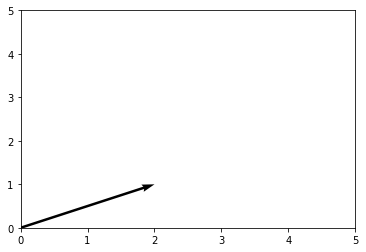

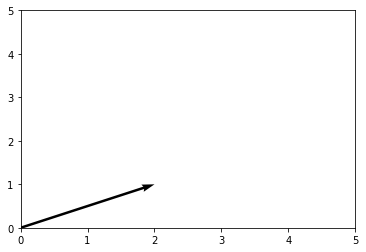

In [31]:
import numpy as np
import matplotlib.pyplot as plt

soa = np.array([[0, 0, 2, 1]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
plt.draw()
plt.show()

向量的長度被定義為$\parallel v \parallel = \sqrt{v_1^2 + v_2^2 +\dots + v_n^2}$；當然的，當$\parallel v \parallel = 1$，我們稱這個向量是**單位向量**

### 基本運算

#### 加法

向量$a$和向量$b$的加法定義為：$\mathbf{a} + \mathbf{b} = \begin{bmatrix} a_1 + b_2 \\ a_2 + b_2 \\ \dots \\a_n + b_n \end{bmatrix}$<br>
下面通過畫圖來示意向量$\mathbf{a} = \begin{bmatrix} -1 \\ 2 \end{bmatrix}$與$\mathbf{b} = \begin{bmatrix}3 \\ 1\end{bmatrix}$相加，等於$\begin{bmatrix} 2 \\ 3 \end{bmatrix}$

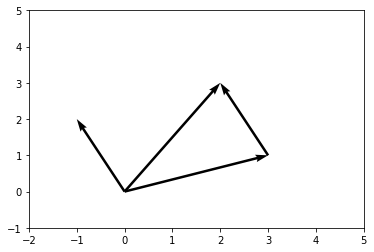

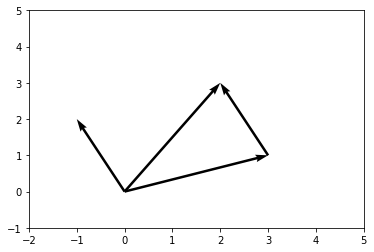

In [32]:
import numpy as np
import matplotlib.pyplot as plt

soa = np.array([[0, 0, -1, 2], [0, 0, 3, 1], [0, 0, 2, 3],[3,1,-1,2]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-2, 5])
ax.set_ylim([-1, 5])
plt.draw()
plt.show()

可以看出，向量的加法是遵從平行四邊形法則的，在`python`中，我們可以直接用`numpy`的`ndarray`來表示向量：

In [33]:
import numpy as np
a = np.array([-1,2])
b = np.array([3,1])
print(a+b)

[2 3]
[2 3]


#### 減法

了解了加法了，減法就相當於加了一個反方向的向量，$\mathbf{a} - \mathbf{b} = \begin{bmatrix} a_1 - b_1 \\ a_2 - b_2 \\ \ldots \\ a_n - b_n \end{bmatrix}$，下面通過畫圖來示意向量$\mathbf{a} = \begin{bmatrix} -1 \\ 2 \end{bmatrix}$與$\mathbf{b} = \begin{bmatrix}3 \\ 1\end{bmatrix}$相減，等於$\begin{bmatrix} -4 \\ 1 \end{bmatrix}$

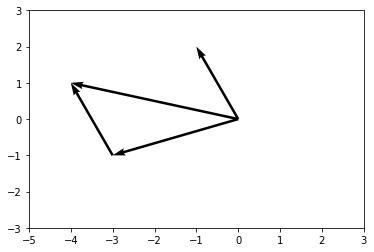

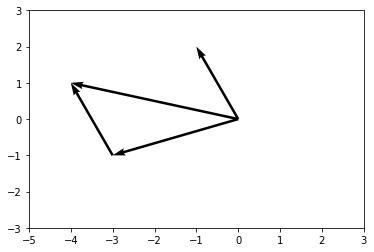

In [41]:
import numpy as np
import matplotlib.pyplot as plt

soa = np.array([[0, 0, -1, 2], [0, 0, -3, -1], [0, 0, -4, 1],[-3,-1,-1,2]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-5, 3])
ax.set_ylim([-3, 3])

plt.show()

In [35]:
import numpy as np
a = np.array([-1, 2])
b = np.array([3, 1])
print(a - b)


[-4  1]
[-4  1]


#### 乘法

##### 標量乘以向量

標量$c$乘以向量$\mathbf{a}$定義為：$c \cdot \mathbf{a} = \begin{bmatrix} c \cdot a_1 \\ c \cdot a_2 \\ \ldots \\ c \cdot a_n \end{bmatrix} = \begin{bmatrix} a_1 \cdot c \\ a_2 \cdot c \\ \ldots \\ a_n \cdot c \end{bmatrix}$<br>
用圖來示意$\mathbf{a} \begin{bmatrix} -1 \\2 \end{bmatrix}$乘以一個標量$3$得到$\begin{bmatrix}-3 \\ 6 \end{bmatrix}$

In [36]:
import numpy as np
a = np.array([-1,2])
print(3 * a)

[-3  6]
[-3  6]


##### 向量點積

定義如下：$\vec{\mathbf{a}}\cdot \vec{\mathbf{b}} = \begin{bmatrix} a_1 \\ a_2 \\ \ldots \\ a_n\end{bmatrix} \cdot \begin{bmatrix} b_1 \\ b_2 \\ \ldots \\ b_n \end{bmatrix} = a_{1}b_{1} + a_{2}b_{2} + \ldots + a_{n}b_{n}$ 可以看出，向量點積得到的是一個標量；<br>
例如: $\begin{bmatrix} 3 \\ 5 \\ 2 \end{bmatrix} \cdot \begin{bmatrix} 1 \\ 4 \\ 7 \end{bmatrix} = 3 \cdot 1 + 5 \cdot 4 + 2 \cdot 7 = 37$

In [37]:
import numpy as np

vec_1 = np.array([3,5,2])
vec_2 = np.array([1,4,7])
print(np.dot(vec_1, vec_2)) # dot product of vectors
print(np.cross(vec_1, vec_2)) # cross multipication of vectors

37
[ 27 -19   7]
37
[ 27 -19   7]


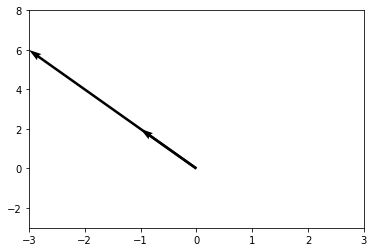

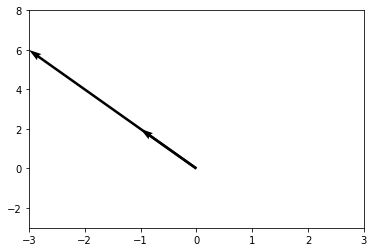

In [43]:
import numpy as np
import matplotlib.pyplot as plt

soa = np.array([[0, 0, -1, 2], [0, 0, -3, 6]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 8])
plt.draw()
plt.show()

可以看出，第一個答案是點乘出來的結果，在`python-numpy`中，我們用`np.dot(vector, vector)`來計算兩個或多個向量的點積。而`(vector * vector)`則是計算向量的叉乘結果，下面來介紹一下叉乘（向量積）：<br>
它是向量和向量的乘積，不過結果是一個向量，它的集合意義是所得的向量和被乘向量所在的平面垂直，方向由右手定則規定，大小是兩個被乘向量張成的平行四邊形的面積。所以，向量積不滿足交換律。下面主要介紹在$\mathbf{R}^2$和$\mathbf{R}^3$的情況下的向量積：<br>
$\mathbf{R}^2$的向量積：<br>
<center>$\begin{bmatrix} a_1 \\ a_2\end{bmatrix} \times \begin{bmatrix} b_1 \\ b_2 \end{bmatrix} = \begin{bmatrix} a_1 \cdot b_2 - a_2 \cdot b_1\end{bmatrix}$</center><br>
例如：<center>$\begin{bmatrix} 1 \\ 2 \end{bmatrix} \times \begin{bmatrix} 3 \\4 \end{bmatrix} 
=\begin{bmatrix} 1 \cdot 4 - 3 \cdot 2 \end{bmatrix}= \begin{bmatrix}-2\end{bmatrix}$</center>

$\mathbf{R}^3$的向量積：<br>
<center>$\begin{bmatrix} a_1 \\ a_2 \\ a_3\end{bmatrix} \times \begin{bmatrix} b_1 \\ b_2 \\ b_3 \end{bmatrix} = \begin{bmatrix} a_2 \cdot b_3 - a_3 \cdot b_2 \\ a_3 \cdot b_1 - a_1 \cdot b_3 \\ a_1 \cdot b_2 - a_2 \cdot b_1\end{bmatrix}$</center><br>
例如：<center>$\begin{bmatrix} 3 \\ 5 \\ 2 \end{bmatrix} \times \begin{bmatrix} 1 \\ 4 \\ 7 \end{bmatrix} =\begin{bmatrix} 5 \cdot 7 - 2 \cdot 4 \\ 2 \cdot 1 - 3 \cdot 7 \\ 3 \cdot 4 - 5 \cdot 1\end{bmatrix}= \begin{bmatrix} 27 \\ -19 \\ 7\end{bmatrix}$</center><br>
可以看出，向量積的結果就是一個新的向量。

In [38]:
import numpy as np
a = np.array([3, 5, 2])
b = np.array([1, 4, 7])
print(np.cross(a, b)) # cross multipication of vec a and vec b

[ 27 -19   7]
[ 27 -19   7]


之前我們所講的向量長度的定義式：$\left\| \vec{\mathbf{v}} \right\| = \sqrt{v_{1}^{2} + v_{2}^{2} + \ldots + v_{n}^{2}}$，如果我們連立向量點積的定義就可以得出$\parallel \mathbf{v} \parallel = \sqrt{\vec{v}\cdot \vec{v}}$<br>
關於點積，還有一個重要的重要的性質，就是**柯西不等式**：
**對於兩個非零向量，$\vec{x}, \vec{y} \in \mathbf{R}^n, |\vec{x}\cdot \vec{y}| \leq \parallel \mathbf{x}\parallel \parallel\mathbf{y} \parallel$，當且僅當$\vec{\mathbf{x}} = c\vec{\mathbf{y}}$時，等號成立**。證明如下：<br>
<center>$\begin{align}
\left\|\vec{\mathbf{x}} + \vec{\mathbf{y}}\right\|^2 & = (\vec{\mathbf{x}} + \vec{\mathbf{y}})\cdot (\vec{\mathbf{x}} + \vec{\mathbf{y}}) \\\
 & = \left\|\vec{\mathbf{x}}\right\|^2 + 2\vec{\mathbf{x}}\vec{\mathbf{y}} + \left\|\vec{\mathbf{y}}\right\|^2 \\\
& \le 
\left\|\vec{\mathbf{x}}\right\|^2 + 2\left\|\vec{\mathbf{x}}\right\|\left\|\vec{\mathbf{y}}\right\| + \left\|\vec{\mathbf{y}}\right\|^2
\end{align}$</center><br>
所以：<br>
<center>$\left\|\vec{\mathbf{x}} + \vec{\mathbf{y}}\right\|^2 \le (\left\|\vec{\mathbf{x}}\right\| + \left\|\vec{\mathbf{y}}\right\|)^2$</center><br>
兩邊開平方後：<br>
<center>$\left\|\vec{\mathbf{x}} + \vec{\mathbf{y}}\right\| \le 
\left\|\vec{\mathbf{x}}\right\| + \left\|\vec{\mathbf{y}}\right\|$</center><br>
這也就是我們高中三角函數裡學過的**三角不等式**，從幾何的角度來說，向量的點積和向量的夾角$\theta$的餘弦值時有關的：$\vec{\mathbf{a}}\cdot\vec{\mathbf{b}} = \left\|\vec{\mathbf{a}}\right\|\left\|\vec{\mathbf{b}}\right\|cos\theta$                                                                      

從另一個角度來看，這其實就是一個向量在另一個向量上的投影: $Proj_L({\vec{\mathbf{x}}}) =  c\vec{\mathbf{v}} = (\frac{\vec{\mathbf{x}}\cdot \vec{\mathbf{v}}}{\vec{\mathbf{v}}\cdot \vec{\mathbf{v}}})\vec{\mathbf{v}}$

In [3]:
import numpy as np
#the first way to define the function
def get_projection(a, b):
    return a.dot(b)*1.0*b/b.dot(b)

a = np.array([1, 2])
b = np.array([2, 2])
print(get_projection(a, b))

[ 1.5  1.5]


In [5]:
import numpy as np 
#the second way to define the function 
find_projection = lambda a, b : a.dot(b) * 1.0 * b/b.dot(b)

a = np.array([1, 2])
b = np.array([2, 2])

print(find_projection(a,b))

[ 1.5  1.5]


這時候再考慮向量積，從集合的角度，向量積和向量間的夾角$\theta$的正弦值有關：$\left\|\vec{\mathbf{a}}\times\vec{\mathbf{b}}\right\| = \left\|\vec{\mathbf{a}}\right\|\left\|\vec{\mathbf{b}}\right\|sin\theta$，這就意味著，向量的向量積反應了兩個向量的正交程度（正交：向量積等於零），$sin\theta = 0$ 正交程度最小，$sin\theta = 1$，正交程度最大。

##### 矩陣的向量積

*矩陣乘法*
我們可以將向量理解成一個$1 \times n$的矩陣，當矩陣$A$的列數與向量$\vec x$的分量數目想等式，矩陣和向量的積有定義：<br>
<center>$\underset{m\times n}{A}\vec{\mathbf{x}}=\begin{bmatrix}a_{11} & a_{12} & \ldots & a_{1n} \\ a_{21} & a_{22} & \ldots & a_{2n} \\ \ldots \\ a_{m1} & a_{m2} & \ldots & a_{mn}\end{bmatrix}\begin{bmatrix}x_1 \\ x_2 \\ \ldots \\ x_n \end{bmatrix} = \begin{bmatrix}a_{11}x_1 + a_{12}x_2 + \ldots + a_{1n}x_n \\ a_{21}x_1 + a_{22}x_2 + \ldots + a_{2n}x_n \\ \ldots \\ a_{m1}x_1 + a_{m2}x_2 + \ldots + a_{mn}x_n \\ \end{bmatrix}$</center><br><br>
例：$\begin{bmatrix}4 & 3 & 1 \\ 1 & 2 & 5\end{bmatrix}  \begin{bmatrix}5 \\ 2 \\ 7\end{bmatrix} = \begin{bmatrix}4\cdot 5 + 3\cdot 2 + 1\cdot 7 \\ 1 \cdot 5 + 2 \cdot 2 + 5 \cdot 7\end{bmatrix} = \begin{bmatrix}33 \\ 44\end{bmatrix}$</center>

矩陣的向量積，可以當作時矩陣的所有列向量的線性組合：<br>
$\underset { m\times n }{ \mathbf{A} } \vec { \mathbf{x} } =\begin{bmatrix} \underbrace { \begin{bmatrix} a_{ 11 } \\ a_{ 21 } \\ \ldots \\ a_{ m1 } \end{bmatrix} }_{ \vec { \mathbf{ V }_{ 1 } }  }  & \underbrace { \begin{bmatrix} a_{ 12 } \\ a_{ 22 } \\\ldots  \\ a_{ m2 } \end{bmatrix} }_{ \vec { \mathbf{ V_{ 2 } } }  } & \ldots & \underbrace { \begin{bmatrix} a_{ 1n } \\ a_{ 2n } \\ \ldots \\ a_{ mn } \end{bmatrix} }_{ \vec { \mathbf{ V_{ n } } }  }  \end{bmatrix}\begin{bmatrix} x_{ 1 } \\ x_{ 2 } \\ \ldots \\ x_{ n } \end{bmatrix}=x_1\vec{\mathbf{V}_1}+x_2\vec{\mathbf{V}_2}+\ldots+x_n\vec{\mathbf{V}_n}$

而向量$\vec{x}$的每一個份量可以看成$\mathbf{A}$的每一個列向量的加權。**一個矩陣其實就是一個線性變換，一個矩陣乘以一個向量後得到的向量，其實就相當於將這個向量進行了線性變換。**

### 向量的轉置 

向量$ \vec{\mathbf{V}} = \underbrace{\begin{bmatrix}v_1 \\ v_2 \\ \ldots \\ v_n \end{bmatrix}}_{n\times 1}$ 的轉置定義為$\mathbf{V}^T = \underbrace{\begin{bmatrix}v_1 & v_2 & \ldots & v_n \end{bmatrix}}_{1 \times n}$

In [10]:
# we use V = (2,4) to give a example
import numpy as np

vec_3 = np.array([[2,4]]) # if we use double bracket, we are writing a two dimentional vecotr
print(vec_3.T) # print the transport of vec_3

[[2]
 [4]]


向量的轉置有一個性質：一個向量$\vec {v}$ 點乘另一個向量$\vec{w}$，其結果和向量$\vec{v}$轉置後和向量$\vec{w}$做矩陣乘法相同。即：$\vec{\mathbf{v}} \cdot \vec{\mathbf{w}} = \vec{\mathbf{v}}^T \vec{\mathbf{w}}$

## Chapter Four Vector Space

### 張成空間（span）

一組向量的張成空間，說白了就是指這些向量隨便線性組合後能夠表示多少個向量，也被稱為線性生成空間。記做$span(S)$；如果$S = \{v_1, v_2, \dots, v_n\}$是 $V$的有限子集，則生成空間為：$span(S) = span(v_1, v_2, \dots, v_n) = \{\lambda_1 v_1, \lambda_2 v_2, \dots, \lambda_n v_n|\lambda_1, \lambda_2, \dots, \lambda_n \in K\}$
<br>
例如，對於$\mathbf{R}^2$空間中兩個不平行的非零向量$\vec{vec_4} = \begin{bmatrix} 2 \\ 1 \end{bmatrix}$和向量$\vec{vec_5} = \begin{bmatrix} 0 \\ 3 \end{bmatrix}$，不難發現，這兩個向量可以表示二維空間$\mathbf{R}^2$中的任意一個向量，即，$span(\vec{vec_4}, \vec{vec_5}) = \mathbf{R}^2$，證明如下：

對於$\mathbf{R}^2$中任意向量$\begin{bmatrix} x \\ y \end{bmatrix}$，假設可以用$vec_4$和$vec_5$線性組合而成，<br>
那麼有：$c_1 \begin{bmatrix}2 \\ 1\end{bmatrix} + c_2 \begin{bmatrix} 0 \\ 3 \end{bmatrix} = \begin{bmatrix} x \\ y \end{bmatrix}$<br>
即：$\left\{
\begin{align}
c_1 \cdot 2 & + c_2 \cdot 0 &= x\\\
c_1 \cdot 1 & + c_2 \cdot 3 &= y
\end{align}
\right.$ <br>
求解得：
$\left\{
\begin{align}
c_1 &= \frac{x}{2}\\
c_2 &= \frac{y}{3} - \frac{x}{6}
\end{align}
\right.$<br>
由於$x, y$的值已經確定，所以$c_1，c_2$的值也必然是唯一的。

### 線性相關和線性無關（Linearly Dependent and Linearly Independent）

在線性代數裡，向量空間的一組元素中，若沒有向量可用有限個其他向量的線性組合所表示，则稱為線性無關或線性獨立（linearly independent），反之稱為線性相關（linearly dependent）。例如在三維歐幾里得空間$\mathbf{R}^3$的三個向量$(1, 0, 0)，(0, 1, 0)$ 和$(0, 0, 1)$線性無關。但$(2, −1, 1)，(1, 0, 1)$和 $(3, −1, 2)$線性相關，因為第三個是前兩個的和。<br>
*相信各位都已知道那八條還是十條相關性，這裡不做贅述*<br>
上面那個例子例如，$\vec{vec_4} = \begin{bmatrix} 2 \\ 1 \end{bmatrix}$和向量$\vec{vec_5} = \begin{bmatrix} 0 \\ 3 \end{bmatrix}$，如果給他們再加一個向量$\vec{vec_6} = \begin{bmatrix} 5 \\ 2 \end{bmatrix}$，由於$\vec{vec_5}$可以由其他兩個向量線性組合而成，由三個向量共同張成的空間並沒有發生變化，仍然是$\mathbf{R}^3$，因此稱集合$\{\vec{vec_3}, \vec{vec_4}, \vec{vec_5}\}$線性相關。

### 如何判斷是否線性相關

一個向量集合$s = v_1, v_2, \dots, v_n$ 線性相關的充分必要是存在一部分非零係數使得：$c_1v_1 + c_2v_2 + \dots + c_nv_n = \begin{bmatrix} 0 \\ 0 \\ \dots \\ 0 \end{bmatrix}$。<br>
例如：向量：$\begin{bmatrix}2 \\ 1\end{bmatrix}$ 和 $\begin{bmatrix}3 \\ 2\end{bmatrix}$，則先寫出如下等式：
$c_1 \begin{bmatrix}2 \\ 1\end{bmatrix} + c_2 \begin{bmatrix}3 \\ 2\end{bmatrix} = \begin{bmatrix}0 \\ 0\end{bmatrix}$,<br>
容易求解得：$\begin{bmatrix}c_1 \\ c_2\end{bmatrix} = \begin{bmatrix}0 \\ 0\end{bmatrix}$，說明這兩個向量線性無關。<br>
類似的，對於三個$\mathbf{R}^3$中的向量$\begin{bmatrix}2 \\ 0 \\ 0\end{bmatrix}, \begin{bmatrix} 0 \\ 1 \\ 0\end{bmatrix}$和$\begin{bmatrix} 0 \\ 0 \\ 7\end{bmatrix}$，不難判斷出它們是線性無關的，它們共同張成了$\mathbf{R}^3$空間。<br>
而對於向量集合：$\left\{\begin{bmatrix}2 \\ 1\end{bmatrix}, \begin{bmatrix}3 \\ 2\end{bmatrix}, \begin{bmatrix}1 \\ 2 \end{bmatrix}\right\}$，不難算出存在非零係數：$\begin{bmatrix}c_1 \\ c_2 \\ c_3\end{bmatrix} = \begin{bmatrix}-4 \\ 3 \\ -1\end{bmatrix}$ 使得 $c1 \begin{bmatrix}2 \\ 1\end{bmatrix} + c_2 \begin{bmatrix}3 \\ 2\end{bmatrix} + c_3 \begin{bmatrix}1 \\ 2 \end{bmatrix} = \begin{bmatrix}0 \\ 0\end{bmatrix}$。因此，此集合線性相關。

## Chapter Five Linear Algebra Advanced Text

在前面幾張，已經簡單介紹了線性代數中最基本的數據表達方式：**矩陣**和**向量**。有了這兩個數學工具作為基礎，我們可以進一步討論下面的內容：<br>
1. 如何理解線性代數的基。<br>
2. 向量中的子空間、另空間、列空間、行空間、零空間都是什麼？我們應該如何求解？<br>
3. 如何用線性代數的知識來擬合數據？<br>
4. 機器學習、圖形處理中常見的“特徵向量”究竟是什麼？它和變換矩陣有什麼關係？<br>


### 階梯形矩陣（Echelon Matrix）

階梯形矩陣是一類非常實用的工具，可以幫助我們求解線性空間的基，這就是能用在諸如計算解不是唯一的方程組之類的問題上。
<br>
#### 階梯形矩陣

若矩陣$\mathbf{A}$滿足如下條件：<br>
1. 若有零行（元素全為零的行），則零行應在最下方；<br>
2. 非零首元（即非零行的第一個不為零的元素）的列標號隨行標號的增加而嚴格遞增。<br>

則這個矩陣稱為階梯形矩陣。

示例：<br>
<center>$\begin{bmatrix}
2 & 0 & 2 & 1 \\
0 & 5 & 2 & -2 \\
0 & 0 & 3 & 2 \\
0 & 0 & 0 & 0
\end{bmatrix}$</center>

#### 行簡化階梯形矩陣（Row Echelon Matrix）

若矩陣$\mathbf{A}$滿足如下條件：<br>
1. 它是階梯形矩陣;<br>
2. 非零首元所在列出了非零首元外，其餘元素都為零。<br>

則稱此矩陣為行簡化階梯形矩陣。

示例：<br>
<center>$\begin{bmatrix}
2 & 0 & 2 & 1 \\
0 & 5 & 2 & -2 \\
0 & 0 & 3 & 2 \\
0 & 0 & 0 & 0
\end{bmatrix}$</center>

#### 行最簡階梯形矩陣（reduced row echelon form）

若矩陣$\mathbf{A}$滿足如下條件：<br>
1. 它是行簡化階梯形矩陣；<br>
2. 非零首元都為一。<br>

則稱它為行最簡階梯形矩陣。下面我們來講講如何將矩陣化簡為最簡階梯形：<br>

對於這個矩陣$\mathbf{A} = \begin{bmatrix}
1 & 2 & 1 & 1 & 7\\ 
1 & 2 & 2 & -1 & 12\\ 
2 & 4 & 0 & 6 & 4
\end{bmatrix}$，使用**初等變換（Elementary Operations of Linear System）**就可以將矩陣轉換成如下形式：
$\begin{bmatrix}
1 & 2 & 1 & 1 & 7\\ 
1 & 2 & 2 & -1 & 12\\ 
2 & 4 & 0 & 6 & 4
\end{bmatrix}
\rightarrow
\begin{bmatrix}
1 & 2 & 1 & 1 & 7\\ 
0 & 0 & 1 & -2 & 5\\ 
2 & 4 & 0 & 6 & 4
\end{bmatrix}
\rightarrow
\begin{bmatrix}
1 & 2 & 1 & 1 & 7\\ 
0 & 0 & 1 & -2 & 5\\ 
0 & 0 & -2 & 4 & -10
\end{bmatrix}
\rightarrow
\begin{bmatrix}
1 & 2 & 1 & 1 & 7\\ 
0 & 0 & 1 & -2 & 5\\ 
0 & 0 & 0 & 0 & 0
\end{bmatrix}
\rightarrow
\begin{bmatrix}
1 & 2 & 0 & 3 & 2\\ 
0 & 0 & 1 & -2 & 5\\ 
0 & 0 & 0 & 0 & 0
\end{bmatrix}$

**行最簡形**非常實用，可以用來解方程（滑稽；例如下面這個方程組：<br>
<center>$\left\{ 
\begin{eqnarray} 
x_1 + 2x_2 + x_3 + x_4 &=& 7 \\\
x_1 + 2x_2 + 2x_3 - x_4 &=& 12 \\\
2x_1 + 4x_2 + 6x_4 &=& 4
\end{eqnarray}
\right.$</center>

按照常理，只有三個方程，肯定無法求解出四個未知數，此時，如果我們使用`numpy.linalg.solve`，求解時就會觸發`LinAlgError`，但是通過化成最簡形，我們可以進一步找出變量的憲制關係。首先，將方程組表達成增廣矩陣形式：<br>
<center>$\begin{bmatrix}
1 & 2 & 1 & 1 & 7\\ 
1 & 2 & 2 & -1 & 12\\ 
2 & 4 & 0 & 6 & 4
\end{bmatrix}$</center>
<br>
然後將其行簡化，得：<br>
<center>$\begin{bmatrix}
1 & 2 & 0 & 3 & 2\\ 
0 & 0 & 1 & -2 & 5\\ 
0 & 0 & 0 & 0 & 0
\end{bmatrix}$</center>

從結果可以看出這個矩陣的主列有兩個，而且是線性無關的。所以矩陣$A$的秩是$2$，，即，$rank\mathbf{(A)} = 2$.

**矩陣的秩的一個特性：矩陣$A$等於矩陣$A$的轉置地秩序，即，**$rank(\mathbf{A})=rank(\mathbf{A^T})$<br>
在`python`中，可以使用`numpy`包中的`linalg.matrix_rank`方法計算矩陣的秩：

In [9]:
import numpy as np
a = np.matrix('1 1 1 1;1 2 3 4;4 3 2 1')
print(np.linalg.matrix_rank(a))

2


**注意**⚠️，在`numpy`中的秩和線性代數裡的秩不是同一個概念。在`numpy`中維度（dimensions）叫做軸（axes），軸的個數叫做秩。

In [11]:
import numpy as np
a = np.matrix('1 1 1 1;1 2 3 4; 0 0 1 0')
print (a.ndim)  # 2（维度）
print (np.rank(a))  # 2（a.ndim 的别名，已经过时）
print (np.linalg.matrix_rank(a))  # 3（秩）

2
2
3


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  after removing the cwd from sys.path.


#### 行空間

有了列空間的定義，行空間顧名思義其實就是矩陣每一行轉置得到的向量張成的自空間，也就是矩陣的轉置的列空間，記做：$R(\mathbf{A}) = C(\mathbf{A}^T)$<br>
例如：矩陣$\mathbf{A} = \begin{bmatrix}1 & 1 & 1 & 1 \\ 1 & 2 & 3 & 4 \\4 & 3 & 2 & 1\end{bmatrix}$的行空間就等於：$R(\mathbf{A}) = C(\mathbf{A}^T) = span\left(\begin{bmatrix}1 \\ 1 \\ 1 \\ 1\end{bmatrix}\begin{bmatrix}1 \\ 2 \\ 3 \\ 4\end{bmatrix}\begin{bmatrix}4 \\ 3 \\ 2 \\ 1\end{bmatrix}\right)$

#### 零空間

上面已經講過了零空間，現在這裡的零空間是指矩陣$A^T$的零空間，也就是**左零空間**。即：$N(\mathbf{A}^T) = \left\{ \vec{\mathbf{x}} | \mathbf{A}^{T} \vec{\mathbf{x}} = \vec{\mathbf{0}} \right\} = \left\{ \vec{\mathbf{x}} | \vec{\mathbf{x}}^{T} \mathbf{A} = \vec{\mathbf{0}}^{T} \right\}$<br>
例如，矩陣$\mathbf{B} = \begin{bmatrix}1 & 1 & 4 \\ 1 & 2 & 3 \\1 & 4 & 2\\ 1 & 3 & 1\end{bmatrix}$的轉置是矩陣$\mathbf{A} = \mathbf{A} = \begin{bmatrix}1 & 1 & 1 & 1 \\ 1 & 2 & 3 & 4 \\4 & 3 & 2 & 1\end{bmatrix}$，因此左零空間等於：$N(\mathbf{B^T}) = N(\mathbf{A}) = span\left(\begin{bmatrix} 1 \\ -2 \\ 1 \\ 0 \end{bmatrix} \begin{bmatrix} 2 \\ -3 \\ 0 \\ 1 \end{bmatrix}\right)$；由於轉置是對稱的，所以矩陣$A$的轉置的左零空間也是矩陣$A$的零空間。

#### 子空間的正交補

假設$V$是$R^n$的一個子空間，那麼$V$的正交補$V^\perp$也是一個子空間，定義為$\left\{\vec{\mathbf{x}} | \vec{\mathbf{x}} \vec{\mathbf{v}}=0\right\}$，也就是說$R^n$中所有正交於$V$的向量所組成的子空間。<br>
由於正交是對稱的，所以正交補也是對稱的。一個子空間的正交補的正交補依然等於這個子空間。<br>
矩陣的零空間是行空間的正交補：$N(\mathbf{A}) = R(\mathbf{A})^{\bot}$；反過來，矩陣的左零空間是列空間的正交補：$N(\mathbf{B}^T) = C(\mathbf{B})^{\bot}$

### 最小二乘逼近

最小二乘法是一個使用的數學工具，利用它在方程誤解的情況下給出近似解。在機器學習中，最小二乘逼近是一個重要的擬合方法。<br>
假設有一個方程：$\underset{n\times k}{\mathbf{A}}\vec{\mathbf{x}} = \vec{\mathbf{b}}$<br>
無解。把上式寫成：$\vec{a_1}\vec{\mathbf{x}} + \vec{a_2}\vec{\mathbf{x}} + \ldots + \vec{a_k}\vec{\mathbf{x}} = \vec{\mathbf{b}}$<br>
無解，就意味著$\mathbf{A}$的所有列向量的張成空間不包括向量$\vec{b}$。即：$\vec{\mathbf{b}} \notin span(C(\mathbf{A}))$<br>


我們可以通過最小二乘法，求解出近似解。即，要找出一些$\vec{x*}$使得$\left\|\vec{\mathbf{b}}-\mathbf{A}\vec{\mathbf{x}^*}\right\|$最小。用向量$\vec{\mathbf{V}}$代表$\mathbf{A}\vec{\mathbf{x*}}$，有：<br>
$\left\|
\begin{bmatrix}
\vec{b_1}-\vec{v_1}\\
\vec{b_2}-\vec{v_2}\\
\ldots\\
\vec{b_n}-\vec{v_n}\\
\end{bmatrix}
\right\|^2
= 
(b_1-v_1)^2 + (b_2-v_2)^2 + \ldots + (b_n-v_n)^2$<br>
把這個值最小化的過程叫做**最小二乘逼近**。

如何求出$\mathbf{A}\vec{\mathbf{x*}}$這個近似值呢？從集合上考慮，列空間可以看成空間中張成的一個平面，而平面$\vec{b}$並不落在這個平面上。但我們知道，在這個平面上與向量$\vec{b}$最接近的向量就是它的投影！所以，$\mathbf{A}\vec{\mathbf{x}^*} = Proj_{C(\mathbf{A})}\vec{\mathbf{b}}$，直接計算$Proj_{C(\mathbf{A})}\vec{\mathbf{b}}$並不簡單。不過，$\vec{\mathbf{b}}-\mathbf{A}\vec{\mathbf{x}}$其實就是$\mathbf{A \vec{x}}$的正交補，所以一個簡單的求解方法是將原來無解的方程做成一個$\mathbf{A}$的轉置再求解：$\mathbf{A}^T\mathbf{A}\vec{\mathbf{x}^*} = \mathbf{A}^T\vec{\mathbf{b}}$得出的解就是原方程的近似解。

#### 示例 解下列方程組
$\left\{ 
\begin{eqnarray} 
x + y &=& 3 \\\
x - y &=& -2 \\\
y &=& 1
\end{eqnarray}
\right.$<br>
將三個方程表示的直線畫出來，可以看出這三條直線並沒有交點：

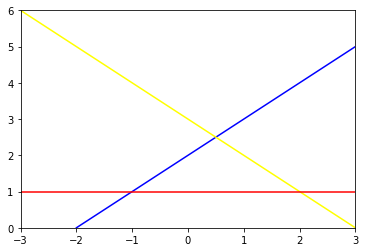

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

plt.xlim(-3,3)
plt.ylim(0,6)
plt.plot([-2,3],[0,5],'blue',[-3,3],[6,0],'yellow',[-3,3],[1,1],'red')

那麼，我們應該如何找出一個與三條直線距離最近的一個點呢？這時候就可以使用最小二乘逼近了。<br>
先將方程寫成矩陣和向量的形式：<br>
<center>$\underbrace{
\begin{bmatrix}
1 & 1 \\
1 & -1 \\
0 & 1
\end{bmatrix}
}_{\mathbf{A}}
\underbrace{
\begin{bmatrix}
x \\
y
\end{bmatrix}
}_{\vec{\mathbf{x}}}
=
\underbrace{
\begin{bmatrix}
3 \\
-2 \\
1
\end{bmatrix}
}_{\vec{\mathbf{b}}}$</center>

這個等式的最小二乘逼近就是：<br>
<center>$\begin{align}
\begin{bmatrix}
1 & 1 & 0 \\
1 & -1 & 1\\
\end{bmatrix}
\begin{bmatrix}
1 & 1 \\
1 & -1 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
x^* \\
y^*
\end{bmatrix}
& = 
\begin{bmatrix}
1 & 1 & 0 \\
1 & -1 & 1\\
\end{bmatrix}
\begin{bmatrix}
3 \\
-2 \\
1
\end{bmatrix}
\\\
\begin{bmatrix}
2 & 0 \\
0 & 3
\end{bmatrix}
\begin{bmatrix}
x^* \\
y^*
\end{bmatrix}
& =
\begin{bmatrix}
1 \\
6
\end{bmatrix}
\end{align}$</center>
<br>

由於是二解方程，我們可以很容易求出矩陣$\begin{bmatrix}2 & 0 \\ 0 & 3\end{bmatrix}$的逆是：$\begin{bmatrix}\frac{1}{2} & 0 \\ 0 & \frac{1}{3}\end{bmatrix}$<br>

所以：
<br>
<center>
$\begin{bmatrix}
x^* \\
y^*
\end{bmatrix}
=
\begin{bmatrix}\frac{1}{2} & 0 \\ 0 & \frac{1}{3}\end{bmatrix}
\begin{bmatrix}
1 \\
6
\end{bmatrix}
=
\begin{bmatrix}
\frac{1}{2} \\
2
\end{bmatrix}$
    

在`python`中，可以使用`numpy.linalg.lstsq`方法來求解最小二乘逼近。

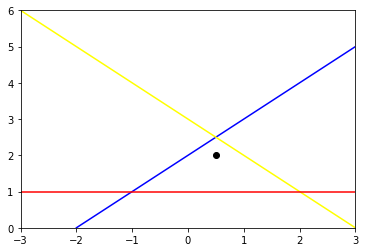

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

x = [0.5]
y = [2]
plt.xlim(-3,3)
plt.ylim(0,6)
plt.plot([-2,3],[0,5],'blue',[-3,3],[6,0],'yellow',[-3,3],[1,1],'red',xData,yData1,'black')
plt.scatter(x,y,color = 'black')

In [30]:
a = np.array([[1, 1], [1, -1], [0, 1]])
b = np.array([3, -2, 1])
x = np.linalg.lstsq(a,b)
print(x)

(array([ 0.5,  2. ]), array([ 1.5]), 2, array([ 1.73205081,  1.41421356]))


`numpy.inalg.lstsq`的返回值包括了四個部分：<br>
1. 最小二乘逼近，如果`b`是二維的，那麼這個逼近的結果有多個列，每一列是一個逼近解，逼近解就是$\begin{bmatrix}0,5 \\ 2 \end{bmatrix}$.<br>
2. 殘差。即，每一個`b - a*x`的長度的和。對於上例，殘差是$1.5$.<br>
3. 矩陣$a$的秩。對於上例，矩陣$a$的秩為$2$。<br>
4. 矩陣$a$的歧異值。對於上例，矩陣$a$的奇異值為：$\begin{bmatrix}1.73205081 \\  1.41421356\end{bmatrix}$

#### 线性回归

問題：給定$4$個坐標點$(-1,0),(0,1),(1,),(2,1)$，求一條經過這些點的直線$y = mx + b$。<br>
將四個點畫圖如下：

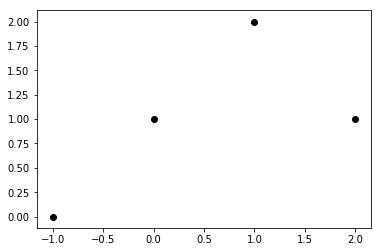

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *


x = [-1,0,1,2]
y =[0,1,2,1]

plt.scatter(x,y,color = 'black')

顯然這樣的直線並不存在。然而我們能夠使用最小二乘逼近，找到一條盡可能靠近這些點的直線。將四個點表示成方程組的形式：<br>
<center>
$\left\{
\begin{eqnarray}
f(-1) &= -m + b = 0\\\
f(0) &= 0 + b  = 1\\\
f(1) &= m + b = 2\\\
f(2) &= 2m + b = 1
\end{eqnarray}
\right.$
</center>
然後方程組用矩陣和向量的形式：<br>
<center>
    $\underbrace{
\begin{bmatrix}
-1 & 1 \\
0 & 1 \\
1 & 1 \\
2 & 1
\end{bmatrix}
}_{\mathbf{A}}
\underbrace{
\begin{bmatrix}
m\\
b
\end{bmatrix}
}_{\vec{\mathbf{x}}}
=
\underbrace{
\begin{bmatrix}
0\\
1\\
2\\
1
\end{bmatrix}
}_{\vec{\mathbf{b}}}$
</center>
這兩個等式的最小二乘逼近就是：<br><center>
    $\begin{align}
\begin{bmatrix}
-1 & 0 & 1 & 2 \\
1 & 1 & 1 & 1
\end{bmatrix}
\begin{bmatrix}
-1 & 1 \\
0 & 1 \\
1 & 1 \\
2 & 1
\end{bmatrix}
\begin{bmatrix}
m^*\\
b^*
\end{bmatrix}
&=
\begin{bmatrix}
-1 & 0 & 1 & 2 \\
1 & 1 & 1 & 1
\end{bmatrix}
\begin{bmatrix}
0\\
1\\
2\\
1
\end{bmatrix}\\\
\begin{bmatrix}
6 & 2 \\
2 & 4
\end{bmatrix}
\begin{bmatrix}
m^*\\
b^*
\end{bmatrix}
&=
\begin{bmatrix}
4\\
4
\end{bmatrix}
\end{align}$</center>

容易求得$\begin{bmatrix}6 & 2\\2 & 4\end{bmatrix}$的逆$\frac{1}{20}\begin{bmatrix}4 & -2\\-2 & 6\end{bmatrix}$，因此<br><center>
    $\begin{bmatrix}m^*\\b^*\end{bmatrix} = \frac{1}{20}\begin{bmatrix}4 & -2\\-2 & 6\end{bmatrix}\begin{bmatrix}4 \\ 4\end{bmatrix} = \frac{1}{20}\begin{bmatrix}8 \\ 16\end{bmatrix} = \begin{bmatrix}\frac{2}{5} \\ \frac{4}{5}\end{bmatrix}$
</center>
    
將直線$y = \frac{2}{5}x + \frac{4}{5}$繪圖如下所示：    

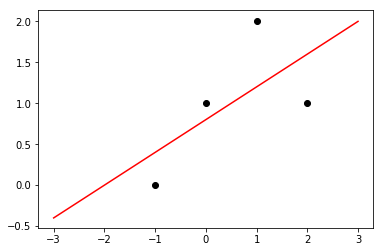

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *


x = [-1,0,1,2]
y =[0,1,2,1]
x1 = np.linspace(-3,3)
y1 = lambda x: 2*x/5 + 4/5
plt.scatter(x,y,color = 'black')
plt.plot(x1,y1(x1),'r')

這就是所求的直線的近似解。

In [45]:
a = np.matrix('-1 1;0 1;1 1;2 1')
b = np.array([0, 1, 2, 1])
x = np.linalg.lstsq(a, b)
print(x)

(array([ 0.4,  0.8]), array([ 1.2]), 2, array([ 2.68999405,  1.66250775]))


### 特徵向量（Elgen Vector）

“特徵”在模式識別和圖像處理中是一個非常常見的詞彙，我們要認識和描繪一件事物，首先就要找出這個事務的特徵。同樣的道理，要讓計算機識別一件事物，稍嫌就要讓計算機學會理解或者抽象出食物的特徵。什麼樣的東西能當成特徵呢？那必須是能“放之四海而皆準”的依據。不論個體如何變幻，都能從中吵到這類群裡共有的特點。<br>
在線性代數中，“特徵”就是一個更抽象的描述。我們知道，矩陣乘法對應了一個變換，是把任意一個向量變換成裡一個方向或長度都大多不同的新向量。在這個變幻的過程中，原向量主要發成旋轉、伸縮的變化。如果矩陣對某一個向量或某些向量只發生伸縮（尺度）變換，而沒有產生旋轉的效果（也就意味著張成的子空間發生改變），這樣的向量就被認為是特徵向量。<br>
<center>
    $\mathbf{T}(\vec{\mathbf{v}}) = \underbrace{\mathbf{A}}_{n\times n}\vec{\mathbf{v}} = \underbrace{\lambda}_{特征值} \overbrace{\vec{\mathbf{v}}}^{特征向量}$
</center>

其中，$\mathbf{T}$是一種線性變換，我們知道線性變換，我們知道線性變換可以用矩陣向量積來表示，因此可以表示成$\mathbf{A \vec{v}}$。$\mathbf{A}$是一個$n \times n$的方陣。$\vec{v}$就是特徵向量（Elgen Vector），也就是「能被伸縮的向量」（要求是非$0$向量），而$\lambda$的特徵向量$\vec{v}$所對應的特徵之，也就是「伸縮了多少」。如果特徵之是負數，那說明了矩陣不但吧向量拉長（縮短）了，而且讓向量只想了相反的方向。

**簡而言之，特徵就是在線性變量當中不變的向量**

#### 求解特徵值

非$0$向量$\vec{v}$是線性變化矩陣$\mathbf{A}$的特徵向量，需要滿足如下條件：<br>

<center>
    $det(\lambda \mathbf{I}_n - \underbrace{\mathbf{A}}_{n\times n}) = 0$
</center>

其中，$det$表示矩陣行列式，$\lambda$是特徵值，$\mathbf{I}$是單位矩陣。<br>
例如矩陣$\mathbf{A} = \begin{bmatrix}1 & 2 \\ 4 & 3\end{bmatrix}$，代入公式$2$得：<br>
<center>
    $\begin{align} det\left( \lambda \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}-\begin{bmatrix} 1 & 2 \\ 4 & 3 \end{bmatrix} \right)  &=0 \\ det\left( \begin{bmatrix} \lambda  & 0 \\ 0 & \lambda  \end{bmatrix}-\begin{bmatrix} 1 & 2 \\ 4 & 3 \end{bmatrix} \right)  &=0 \\ det\left( \begin{bmatrix} \lambda -1 & -2 \\ -4 & \lambda -3 \end{bmatrix} \right)  &=0 \end{align}$
</center>
所以有：<br>
<center>
    $\begin{align} (\lambda -1)(\lambda -3)-8 & =0 \\ \lambda ^{ 2 }-4\lambda -5 &=0 \\ (\lambda - 5)(\lambda +1) &= 0\end{align}$
</center>
因此$\lambda$得值等於$5$或者$-1$。<br>
在`python`中，可以使用`numpy.linalg.eigvals`方法求解一個方陣的特徵值：

In [46]:
a = np.matrix('1 2;4 3')
print(np.linalg.eigvals(a))

[-1.  5.]


In [47]:
b = np.matrix('1 2 3;4 3 1')#如果矩陣不是方針，就會出現 LinalgError 錯誤
print(np.linalg.eigvals(b) )  

LinAlgError: Last 2 dimensions of the array must be square

#### 求解特徵向量

變換矩陣$\mathbf{A}$的特徵空間（特徵向量的空間）可以用下面的等式來求解： <br>
<center>
    $\mathbf{E}_{\lambda}=N(\lambda I_n - \mathbf{A})$
</center>

例如上面的變換矩陣$\mathbf{A} = \begin{bmatrix}1 & 2 \\ 4 & 3 \end{bmatrix}$，帶入公式$3$得：<br>
<center>
    ${ E }_{ \lambda  }=N\left( \lambda I_{ n }-\begin{bmatrix} 1 & 2 \\ 4 & 3 \end{bmatrix} \right) =N\left( \lambda \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}-\begin{bmatrix} 1 & 2 \\ 4 & 3 \end{bmatrix} \right) =N\left( \begin{bmatrix} \lambda -1 & -2 \\ -4 & \lambda -3 \end{bmatrix} \right)$
</center>
當$\lambda = 5$時， <br>
<center>
    ${ E }_{ 5  }=N\left( \begin{bmatrix} 4 & -2 \\ -4 & 2 \end{bmatrix} \right)$
</center>
利用前面所學的零空間的求解方法，得：<br>
<center>
    ${ E }_{ 5  }= span\left(\begin{bmatrix}\frac{1}{2} \\ 1 \end{bmatrix}\right)$
</center>
同樣的，當$\lambda = -1$時，<br>
<center>
    ${ E }_{ -1  }= span\left(\begin{bmatrix}1 \\ -1 \end{bmatrix}\right)$
</center> 

在`python`中，可以使用`numpy.linalg.eig`方法來求解方針的特徵值和特徵向量：

In [ ]:
a = np.matrix('1 2;4 3')
print(np.linalg.eig(a))

得到的元祖中，第一部分時特徵值，和前面使用`numpy.linalg.eigvals`得到的結果完全一樣；第二部分時特徵向量，乍一看和我們上面求解的結果不一樣，但如果我們這麼些就完全不一樣了：<br>
<center>
    $\begin{bmatrix}-0.70710678\begin{bmatrix}1 \\ -1\end{bmatrix} & -0.89442719\begin{bmatrix}\frac{1}{2} \\ 1\end{bmatrix} \end{bmatrix}$
</center>

變換矩陣線性無關的特徵向量特別適合作為空間的基，因為在這些方向上變換矩陣可以拉伸向量而不必扭曲和旋轉它，使得計算大為簡單。我們把這種基稱為**特徵基**